In [253]:
import time
import urllib.request
from datetime import datetime, timedelta
import os

from google.transit import gtfs_realtime_pb2

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc

In [207]:
SHINJUKU_ROUTE_IDS = {
    10: "C H 0 1",
    122: "白 6 1",
    135: "宿 7 4",
    138: "宿 7 5",
    147: "早 7 7",
    148: "王 7 8",
    158: "宿 9 1",
    169: "品 9 7",
}

In [3]:
# Helper to convert UNIX timestamp to readable format
def format_time(ts):
    return datetime.fromtimestamp(ts).strftime("%Y-%m-%d %H:%M:%S") if ts else "N/A"

In [99]:
dfs = []
for i in range(9, 20):
    date = f"202504{str(i).zfill(2)}"
    dfs.append(pd.read_csv(f"{date}.csv", index_col=0))

dfs[0].head()

,Vehicle ID,Trip ID,Route ID,Direction,Schedule Relationship,Current Stop Sequence,Current Stop ID,Timestamp,Location
0,K224,12101-3-13-170-1208,10,0.0,0.0,4.0,2250-01,2025-04-09 23:14:06,35.68959045410156 139.69358825683594
1,F584,44201-1-37-170-1214,122,1.0,0.0,2.0,1516-01,2025-04-09 23:15:28,35.737483978271484 139.66888427734375
2,G745,44201-1-37-170-1204,122,1.0,0.0,8.0,1486-02,2025-04-09 23:16:05,35.72273635864258 139.6904296875
3,F577,44201-1-37-170-1154,122,1.0,0.0,13.0,1529-05,2025-04-09 23:16:03,35.7219352722168 139.70632934570312
4,F576,44201-1-37-170-1144,122,1.0,0.0,20.0,0799-02,2025-04-09 23:15:40,35.7138557434082 139.72604370117188


In [116]:
for i in range(9, 20):
    stop_times = pd.read_csv("GTFS/stop_times.csv")
    stop_times = stop_times[["trip_id", "arrival_time", "stop_id", "stop_sequence"]]
    stop_times["arrival_time"] = pd.to_datetime(stop_times["arrival_time"], errors="coerce")
    stop_times["arrival_time"] = stop_times["arrival_time"].apply(
        lambda dt: dt.replace(year=2025, month=4, day=i) if pd.notnull(dt) else pd.NaT
    )
    stop_times.head()

    df = dfs[i - 9]
    df = df.drop_duplicates()
    df = df[["Vehicle ID", "Trip ID", "Route ID", "Current Stop Sequence", "Timestamp"]]
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    df["Timestamp"] = df["Timestamp"].apply(lambda dt: dt.replace(hour=(dt.hour + 13) % 24))

    merged = pd.merge(stop_times, df, left_on=['trip_id', 'stop_sequence'], right_on=['Trip ID', 'Current Stop Sequence'], how='inner')
    merged['Difference'] = (merged['Timestamp'] - merged["arrival_time"])

    merged[["Route ID", "Difference"]].to_csv(f"202504{str(i).zfill(2)}-diffs.csv")
    print(f"Finished 202504{str(i).zfill(2)}-diffs.csv")

C:\Users\Graham\AppData\Local\Temp\ipykernel_8792\1456369796.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stop_times["arrival_time"] = pd.to_datetime(stop_times["arrival_time"], errors="coerce")


Finished 20250409-diffs.csv


C:\Users\Graham\AppData\Local\Temp\ipykernel_8792\1456369796.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stop_times["arrival_time"] = pd.to_datetime(stop_times["arrival_time"], errors="coerce")


Finished 20250410-diffs.csv


C:\Users\Graham\AppData\Local\Temp\ipykernel_8792\1456369796.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stop_times["arrival_time"] = pd.to_datetime(stop_times["arrival_time"], errors="coerce")


Finished 20250411-diffs.csv


C:\Users\Graham\AppData\Local\Temp\ipykernel_8792\1456369796.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stop_times["arrival_time"] = pd.to_datetime(stop_times["arrival_time"], errors="coerce")


Finished 20250412-diffs.csv


C:\Users\Graham\AppData\Local\Temp\ipykernel_8792\1456369796.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stop_times["arrival_time"] = pd.to_datetime(stop_times["arrival_time"], errors="coerce")


Finished 20250413-diffs.csv


C:\Users\Graham\AppData\Local\Temp\ipykernel_8792\1456369796.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stop_times["arrival_time"] = pd.to_datetime(stop_times["arrival_time"], errors="coerce")


Finished 20250414-diffs.csv


C:\Users\Graham\AppData\Local\Temp\ipykernel_8792\1456369796.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stop_times["arrival_time"] = pd.to_datetime(stop_times["arrival_time"], errors="coerce")


Finished 20250415-diffs.csv


C:\Users\Graham\AppData\Local\Temp\ipykernel_8792\1456369796.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stop_times["arrival_time"] = pd.to_datetime(stop_times["arrival_time"], errors="coerce")


Finished 20250416-diffs.csv


C:\Users\Graham\AppData\Local\Temp\ipykernel_8792\1456369796.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stop_times["arrival_time"] = pd.to_datetime(stop_times["arrival_time"], errors="coerce")


Finished 20250417-diffs.csv


C:\Users\Graham\AppData\Local\Temp\ipykernel_8792\1456369796.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stop_times["arrival_time"] = pd.to_datetime(stop_times["arrival_time"], errors="coerce")


Finished 20250418-diffs.csv


C:\Users\Graham\AppData\Local\Temp\ipykernel_8792\1456369796.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stop_times["arrival_time"] = pd.to_datetime(stop_times["arrival_time"], errors="coerce")


Finished 20250419-diffs.csv


In [265]:
threshold = pd.to_timedelta("00:05:00")
under_threshold = pd.DataFrame()
for i in range(9, 20):
    date = f"202504{str(i).zfill(2)}"
    df = pd.read_csv(f"{date}-diffs.csv", index_col=0)
    df["Difference"] = pd.to_timedelta(df["Difference"])

    percent_under_threshold = (
        df.groupby("Route ID")
        .apply(lambda g: (g["Difference"] < threshold).mean())
        .reset_index(name="OTP")
    )
    under_threshold = pd.concat([under_threshold, percent_under_threshold])

averageOTPShinjuku = under_threshold.groupby("Route ID").apply(lambda g: g["OTP"].mean()).reset_index(name="Average OTP")
averageOTPShinjukuSorted = averageOTPShinjuku.sort_values(by=["Average OTP"], ascending=False)
averageOTPShinjukuSorted

C:\Users\Graham\AppData\Local\Temp\ipykernel_8792\540861540.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g["Difference"] < threshold).mean())
C:\Users\Graham\AppData\Local\Temp\ipykernel_8792\540861540.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g["Difference"] < threshold).mean())
C:\Users\Graham\AppData\Local\Temp\ipykernel_8792\540861540.py:10: Depreca

,Route ID,Average OTP
4,147,0.976628
0,10,0.920645
3,138,0.910232
2,135,0.894947
1,122,0.886327
6,158,0.862001
7,169,0.772459
5,148,0.759383


In [266]:
df = pd.read_csv("pgh-otp.csv", index_col=0)
df = df.rename(columns={"route": "Route ID"})
# df = df[df["month_start"].str.startswith("2024")]
averageOTP = df.groupby("Route ID").apply(lambda g: g["on_time_percent"].mean()).reset_index(name="Average OTP")
averageOTPPGH = averageOTP[averageOTP["Route ID"].isin(["61A", "61B", "61C", "61D", "54", "71A", "71B", "71C", "71D"])].reset_index(drop=True)

averageOTPPGHSorted = averageOTPPGH.sort_values(by=["Average OTP"], ascending = False)
averageOTPPGHSorted

C:\Users\Graham\AppData\Local\Temp\ipykernel_8792\563581604.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  averageOTP = df.groupby("Route ID").apply(lambda g: g["on_time_percent"].mean()).reset_index(name="Average OTP")


,Route ID,Average OTP
8,71D,0.681224
5,71A,0.678181
6,71B,0.668718
0,54,0.657858
4,61D,0.656128
2,61B,0.651642
1,61A,0.645773
7,71C,0.614849
3,61C,0.591298


In [255]:
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use("seaborn-v0_8-pastel")

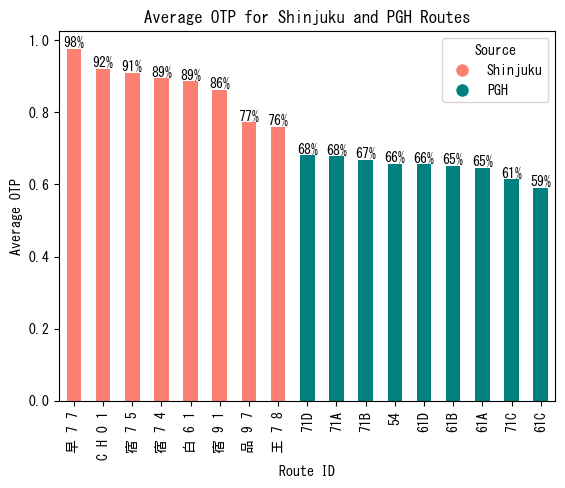

In [ ]:
# Font to allow for Japanese characters
rc('font', **{'family': 'serif', 'serif': ['MS Gothic']})

averageOTPShinjukuSorted["Route ID"] = averageOTPShinjukuSorted["Route ID"].map(SHINJUKU_ROUTE_IDS)

# Add a 'Source' column to both datasets to distinguish them
averageOTPShinjukuSorted['Source'] = 'Shinjuku'
averageOTPPGHSorted['Source'] = 'PGH'

df = pd.concat([averageOTPShinjukuSorted, averageOTPPGHSorted])

df.set_index("Route ID", inplace=True)

ax = df.plot(kind="bar", y='Average OTP', color=df['Source'].map({'Shinjuku': 'salmon', 'PGH': 'teal'}))

ax.set_xlabel('Route ID')
ax.set_ylabel('Average OTP')
ax.set_title('Average OTP for Shinjuku and PGH Routes')

# Manually add a legend
handles, labels = ax.get_legend_handles_labels()
shinjuku_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', markersize=10, label='Shinjuku')
pgh_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='teal', markersize=10, label='PGH')
ax.legend(handles=[shinjuku_patch, pgh_patch], title="Source")

# Add labels to each bar
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    x_position = bar.get_x() + bar.get_width() / 2  # To position the label in the center of the bar
    # Add text annotation for each bar
    ax.text(x_position, height, f'{round(height * 100)}%', ha='center', va='bottom', fontsize=10)

plt.show()

In [274]:
print(averageOTPShinjuku.set_index("Route ID").mean())
print(averageOTPPGH.set_index("Route ID").mean())

Average OTP    0.872828
dtype: float64
Average OTP    0.649519
dtype: float64
